## Imports and constants

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import pandas as pd
import seaborn as sns

N_iter = 500
obs_list = [10, 50, 100, 500, 1000, 5000]
n_noise_vars_range = [0,1,10,50,100,200,500]
true_name = "Amount of true predictors"
noise_name = "Amount of noise variables"
iter_name = "Amount of observations"
r2_name = "R2 scores"

## Simulation and drawinf functions

In [2]:
def sim_X_y(n_obs=100, n_Xs = 1, n_noise_vars = 5):
    X_true = np.random.randn(n_obs, n_Xs)
    # True relationship + noise (all betas are equal to one)
    y = X_true.sum(axis=1) + np.random.randn(n_obs) 
    # Add noise variables
    X_noised = np.hstack((X_true, np.random.randn(n_obs, n_noise_vars)))
    return X_true, X_noised, y


def monte_carlo_simulation(n_obs=1000, n_Xs=1, n_iter=100, n_noise_vars_range = [0,]):
    # Arrays to store the results
    r2_list = []
    for n_noise_vars in n_noise_vars_range:
        cur_r2_scores = []
        for _ in range(n_iter):
            X_true, X_noised, y = sim_X_y(n_obs=n_obs, n_Xs = n_Xs, n_noise_vars = n_noise_vars)
            # Fit Predict LM
            y_pred = LinearRegression().fit(X_noised, y).predict(X_noised)
            # Calc R^2
            cur_r2_scores.append(r2_score(y, y_pred))
        # Calculate the average R^2 for this number of noise variables
        r2_list.append(cur_r2_scores)
    return r2_list


def draw_2d(data_numpy, x_name, y_name, xticks):
    df_long = pd.DataFrame(data_numpy).T.melt(var_name=x_name, value_name=y_name)
    df_long[x_name] = df_long[x_name].astype(int)  # Ensuring the group is an integer for plotting

    plt.figure(figsize=(10, 5))

    # Creating the boxplots
    g = sns.boxplot(x=x_name, y=y_name, data=df_long, palette='Set2')

    # Adding the line through means
    means = df_long.groupby(x_name)[y_name].mean().reset_index()
    sns.lineplot(x=x_name, y=y_name, data=means, color='black', marker='o', linestyle='-', lw=2)

    # Finalizing the plot
    plt.title(f'Distribution of {y_name} for different `{x_name}`.')
    g.set_xticklabels(xticks)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.grid(True)
    plt.show()
    
    
def draw_heatmap(matrix, xname, yname, xticks, yticks, size, annot_size=30):
    plt.figure(figsize=size)
    g = sns.heatmap(matrix, cmap="coolwarm",annot=True, fmt=".2g", annot_kws={"size": annot_size / np.sqrt(len(matrix))},)
    plt.xlabel(xname)
    plt.ylabel(yname)
    g.set_xticklabels(xticks, rotation=0)
    g.set_yticklabels(yticks, rotation=0)
    plt.show()

## Experiments

### R2 ~ number of noise variables

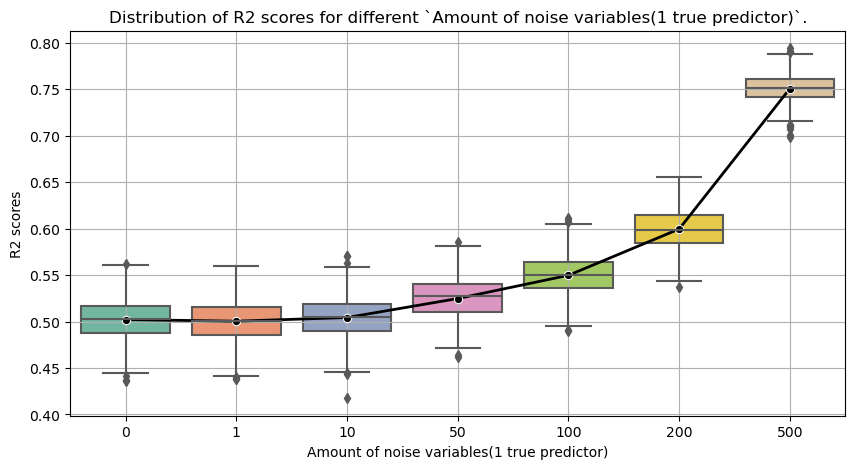

In [3]:
# run MC simulation
r2_scores_diff_noise_vars = monte_carlo_simulation(n_iter = N_iter,
                                                   n_Xs=1,
                                                   n_noise_vars_range=n_noise_vars_range)
# plot MC results
draw_2d(r2_scores_diff_noise_vars, noise_name + "(1 true predictor)", r2_name, n_noise_vars_range)

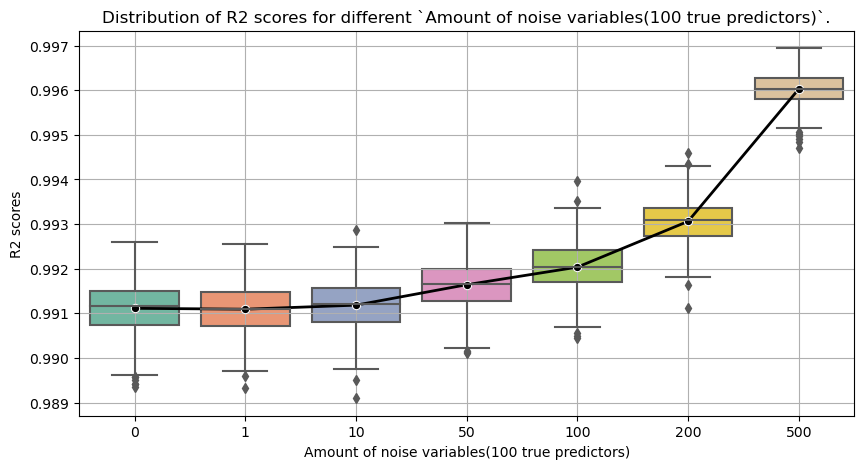

In [4]:
# run MC simulation
r2_scores_diff_noise_vars = monte_carlo_simulation(n_iter = N_iter,
                                                   n_Xs=100,
                                                   n_noise_vars_range=n_noise_vars_range)
# plot MC results
draw_2d(r2_scores_diff_noise_vars, noise_name + "(100 true predictors)", r2_name, n_noise_vars_range)

### R2 ~ number of noise variables and amount of observations.

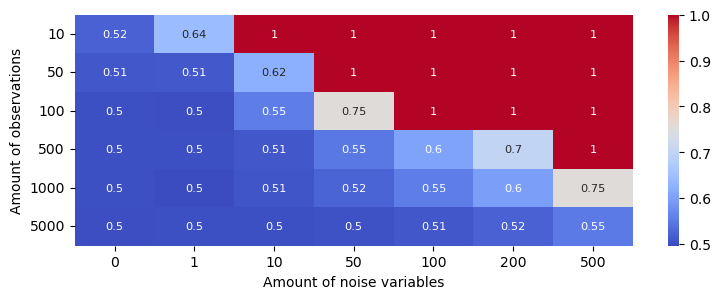

In [5]:
# run MC simulation
avg_r2_scores = [[list(map(lambda x: np.mean(x), monte_carlo_simulation(n_obs = n_obs, 
                                                                        n_Xs=1, 
                                                                        n_noise_vars_range=[n_noised,])))[0] for n_noised in n_noise_vars_range ] for n_obs in obs_list]
# plot MC results
draw_heatmap(avg_r2_scores, noise_name, iter_name, n_noise_vars_range, obs_list, (9,3), 20)

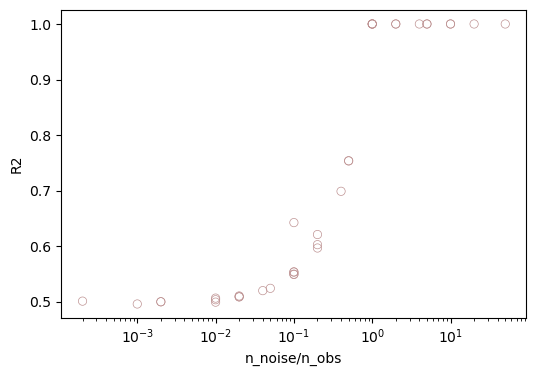

In [7]:
def plot_scatter_from_2darrays(array1, array2, xname, yname):
    # Flatten the arrays
    flat_array1 = array1.flatten()
    flat_array2 = array2.flatten()
    df = pd.DataFrame({
        'Array 1': flat_array1,
        'Array 2': flat_array2
    })
    plt.figure(figsize=(6, 4))
    # Plotting
    sns.scatterplot(data=df, x='Array 1', y='Array 2',color = 'none', edgecolor='rosybrown')
    plt.xscale('log')
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.show()



ratio = np.array([[(i/j) for i in n_noise_vars_range[1:]] for j in obs_list])
r2 = np.array(avg_r2_scores)[:,1:]
plot_scatter_from_2darrays(ratio, r2, 'n_noise/n_obs', "R2")